# Aprendizaje Automático - Selección del modelo

---

## Importar bibliotecas iniciales

In [16]:
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

## Variables globales

In [17]:
# Para cuando se quiera mostrar como ejemplos algunos registros
primeros = 3
raya = "_"*40

## Carga del conjunto de datos

In [18]:
dataset = pd.read_csv('datos_practica.csv', delimiter=';')  
print(dataset.describe())

                  x1             x2              y
count  200000.000000  200000.000000  200000.000000
mean       45.516208      98.186807      28.249618
std        31.513990      60.351872      16.286906
min         0.000016       0.001028       0.000000
25%        16.844719      44.268722      14.145589
50%        44.933090      95.995954      28.245107
75%        73.005882     150.803832      42.348382
max       101.055767     205.845169      57.472201


In [19]:
print(dataset.head(primeros))

          x1          x2          y
0  87.822354  178.663006  49.125563
1  14.407329   29.309812   8.059089
2  65.433748  133.116336  36.601953


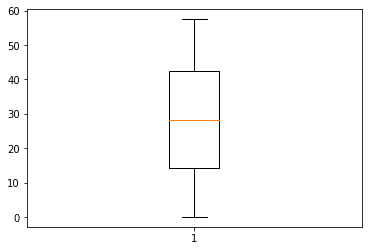

In [20]:
valores_x = np.array(range(0,dataset.shape[0]))
valores_y = np.array(dataset["y"])
plt.boxplot(valores_y)
plt.show()

## Separar columnas

In [21]:
my_data = pd.DataFrame(dataset).to_numpy()
X = my_data[:,0:-1]
cantidad_muestras = len(my_data)
y = my_data[:,-1]

print(X[0:3])
print("\nCantidad de muestras: ", len(my_data))
print("\nCantidad de atributos (incluye y): ", len(my_data[0]))

[[ 87.82235445 178.66300632]
 [ 14.40732869  29.30981153]
 [ 65.43374765 133.1163363 ]]

Cantidad de muestras:  200000

Cantidad de atributos (incluye y):  3


## Separar en dos conjuntos Train y Test

In [22]:
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=split#sklearn.model_selection.train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    shuffle=True,
                                                    random_state=10)   

print("\nCantidad de muestras: ", len(X_train)+len(X_test))
print("\nTamaño del train: ", len(X_train))
print("\nTamaño del test: ", len(X_test))
print("\nPrimeros elementos del X_train:")
print( X_train[0:primeros])
print("\nPrimeros elementos del X_test:")
print( X_test[0:primeros])
print("\nPrimeros elementos del y_train:")
print( y_train[0:primeros])
print("\nPrimeros elementos del y_test:")
print( y_test[0:primeros])



Cantidad de muestras:  200000

Tamaño del train:  140000

Tamaño del test:  60000

Primeros elementos del X_train:
[[ 55.07095356 112.0215775 ]
 [ 16.50168155  33.57049642]
 [ 19.94948981  40.57158803]]

Primeros elementos del X_test:
[[ 59.00870761 120.04543907]
 [ 60.1792545  122.41374256]
 [  3.74760317   7.62400477]]

Primeros elementos del y_train:
[31.75795987  9.23061567 10.66777779]

Primeros elementos del y_test:
[33.00795132 32.18712078  2.0963127 ]


## Escalar los datos

In [23]:
from sklearn.preprocessing import MinMaxScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

# Escalar datos
transformer = MinMaxScaler().fit(X_train)
X_train = transformer.transform( X_train)
X_test = transformer.transform( X_test)

print("\nPrimeros elementos del X_train:")
print( X_train[0:primeros])
print("\nPrimeros elementos del X_test:")
print( X_test[0:primeros])
print("\nPrimeros elementos del y_train:")
print( y_train[0:primeros])
print("\nPrimeros elementos del y_test:")
print( y_test[0:primeros])


Primeros elementos del X_train:
[[0.54495592 0.54420082]
 [0.16329256 0.16308197]
 [0.19741044 0.19709359]]

Primeros elementos del X_test:
[[0.58392208 0.58318109]
 [0.59550526 0.59468642]
 [0.0370842  0.03703276]]

Primeros elementos del y_train:
[31.75795987  9.23061567 10.66777779]

Primeros elementos del y_test:
[33.00795132 32.18712078  2.0963127 ]


## Ejemplo de predicción con Mínimos Cuadrados Ordinarios

In [24]:
from sklearn.linear_model import LinearRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

clf = LinearRegression(fit_intercept=True, 
                       normalize=False, 
                       copy_X=True, 
                       n_jobs=None)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nPrimeros elementos del y_test:")
print( y_test[0:primeros])
print("\nPrimeros elementos del y_pred:")
print( y_pred[0:primeros])
print("\nCoeficientes de la regresión:")
print(clf.coef_)
print("\nIndependent term in the linear model:")
print(clf.intercept_)


Primeros elementos del y_test:
[33.00795132 32.18712078  2.0963127 ]

Primeros elementos del y_pred:
[34.4054038  35.03252725  4.67722901]

Coeficientes de la regresión:
[13.59283037 40.8224266 ]

Independent term in the linear model:
2.6613826421176476


## Métricas para evaluar la predicción

In [25]:
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
from sklearn.metrics import r2_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

metricaMSE = mean_squared_error(y_test, y_pred, squared=False)
# If True returns MSE value, if False returns RMSE value.
print("MSE: ", metricaMSE)
print("R2: ", r2_score(y_test, y_pred) )


MSE:  4.881631878497774
R2:  0.9101634852416783


## Cross validation

In [26]:
from sklearn.model_selection import KFold
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

numFolds = 5

kf = KFold(n_splits=numFolds,
           shuffle=True,
           random_state=10)

resultados = []
kf.get_n_splits(X)
contador = 1
for train_index, test_index in kf.split(X):       
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    

    clf = LinearRegression(fit_intercept=True, 
                       normalize=False, 
                       copy_X=True, 
                       n_jobs=None)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    metrica = mean_squared_error(y_test, y_pred, squared=False)
    # If True returns MSE value, if False returns RMSE value.
    print("corrida: ", contador, " -- ", metrica)
    contador += 1    
    resultados.append( metrica)
print("Promedio: ", sum(resultados) / len(resultados) )


corrida:  1  --  4.871975931533016
corrida:  2  --  4.945508363472996
corrida:  3  --  4.993696491273512
corrida:  4  --  4.904347971131955
corrida:  5  --  4.956879528941193
Promedio:  4.934481657270534


## Bootstrapping 

In [27]:
from sklearn.utils import resample
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

print("Selección de una muestra:")

tamMuestra = int( len(X)*0.10 )
iteraciones = 5

resultados = []
print("\nPara ", iteraciones, " iteraciones de muestras de tamaño ",tamMuestra," :")
for i in range(iteraciones):
    X_muestra, y_muestra = resample(X, 
                                    y, 
                                    replace=False,
                                    n_samples=tamMuestra)    
    X_train, X_test, y_train, y_test = train_test_split(X_muestra, 
                                                        y_muestra, 
                                                        test_size=0.30, 
                                                        shuffle=True,
                                                        random_state=10)   
    clf = LinearRegression(fit_intercept=True, 
                            normalize=False, 
                            copy_X=True, 
                            n_jobs=None)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    metrica = mean_squared_error(y_test, y_pred, squared=False)
    print("corrida: ", i+1, " -- ", metrica)   
    resultados.append( metrica)
print("Promedio: ", sum(resultados) / len(resultados) )
    

Selección de una muestra:

Para  5  iteraciones de muestras de tamaño  20000  :
corrida:  1  --  5.129659648676881
corrida:  2  --  4.932373536816796
corrida:  3  --  4.995393966294205
corrida:  4  --  4.791427387367799
corrida:  5  --  5.049746147361592
Promedio:  4.979720137303454


## Tres conjuntos de datos

Sobre todo cuando se requiren ajustar varios parámetros, se pueden utilizar tres conjuntos de datos:

- Train: 60%
- Validation: 20%  (para selección de hyperparámetros)
- Test: 20%



## Se ejemplificará con la regresión Ridge

In [28]:
from sklearn.linear_model import Ridge
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge


### Opción 1 - Train-Validation  (dos conjuntos)   luego test

In [29]:
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=split#sklearn.model_selection.train_test_split

# 60% Train
X_train, X_, y_train, y_ = train_test_split(X, 
                                            y, 
                                            train_size=0.60, 
                                            shuffle=True,
                                            random_state=10)   

# 20% Validation,  20% Test
X_validation, X_test, y_validation, y_test = train_test_split(  X_, 
                                                                y_, 
                                                                test_size=0.50, 
                                                                shuffle=True, 
                                                                random_state=10)   

print("\nTamaño del train: ", len(X_train))
print("\nTamaño del validation: ", len(X_validation))
print("\nTamaño del test: ", len(X_test))
print("\nCantidad de muestras: ", len(X_train)+len(X_validation)+len(X_test))

def demeMejor(resultados):
    mejor = math.inf
    elMejor = 0.0
    for e in resultados:
        if resultados[e] < mejor:
            mejor = resultados[e]
            elMejor = e
    return mejor, elMejor

print("\n")
# alfa es el hyperparámetro a seleccionar
alfas = [10**i for i in (-5,-4,-3,-2,-1,0,1,2,3,4,5,6) ]
resultados = {}
for alfa in alfas:
    # Ojo que hay Train/Test, no hay cross-validation
    clf = Ridge(alpha=alfa)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_validation)
    metrica = mean_squared_error(y_validation, y_pred,  squared=False)
    resultados[alfa] = metrica
print("Resultados en Train/Validation: \n", resultados)

mejor_metrica, mejor_alfa = demeMejor(resultados)
print("\nMejor valor de métrica: ", mejor_metrica, ", con un alfa de: ", mejor_alfa)

# Ahora se hace el test con el alfa seleccionado con el validation test
clf = Ridge(alpha=mejor_alfa)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrica = mean_squared_error(y_test, y_pred,  squared=False)
print("\nMétrica en Train/Test: ", metrica)




Tamaño del train:  120000

Tamaño del validation:  40000

Tamaño del test:  40000

Cantidad de muestras:  200000


Resultados en Train/Validation: 
 {1e-05: 4.996473491365587, 0.0001: 4.996473491365576, 0.001: 4.996473491365458, 0.01: 4.9964734913642745, 0.1: 4.996473491352448, 1: 4.996473491234179, 10: 4.996473490051493, 100: 4.996473478225767, 1000: 4.996473360081398, 10000: 4.9964721899244395, 100000: 4.996461615002718, 1000000: 4.996466569578138}

Mejor valor de métrica:  4.996461615002718 , con un alfa de:  100000

Métrica en Train/Test:  4.819899597008172


### Opción 2 - Train-Validation  (cross-validation)   luego test

In [30]:
X_trainVal, X_test, y_trainval, y_test = train_test_split(X, 
                                                          y, 
                                                          train_size=0.80, 
                                                          shuffle=True,
                                                          random_state=10)   

print("\nTamaño del train-validation: ", len(X_trainVal))
print("\nTamaño del test: ", len(X_test))

print("\nCantidad de muestras: ", len(X_trainVal)+len(X_test))

def demeMejor(resultados):
    mejor = math.inf
    elMejor = 0.0
    for e in resultados:
        if resultados[e] < mejor:
            mejor = resultados[e]
            elMejor = e
    return mejor, elMejor

alfas = [10**i for i in (-4,-3,-2,-1,0,1,2,3,4) ]
resultados_alfa = {}
print(raya)
for alfa in alfas:
    kf = KFold(n_splits=numFolds,
               shuffle=True,
               random_state=10)
    resultados = []
    kf.get_n_splits(X_trainVal)
    contador = 1
    for train_index, val_index in kf.split(X_trainVal):       
        X_train, X_val = X_trainVal[train_index], X_trainVal[val_index]
        y_train, y_val = y_trainval[train_index], y_trainval[val_index]

        clf = Ridge(alpha=alfa)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        metrica = mean_squared_error(y_val, y_pred, squared=False)
        # If True returns MSE value, if False returns RMSE value.
        contador += 1    
        resultados.append( metrica)
    promedio = sum(resultados) / len(resultados) 
    print("\nMétricas obtenidas en cross-validation para alfa de: ", alfa, " - ", resultados, 
          "     con un promedio de: ", promedio)
    resultados_alfa[alfa] = promedio

print(raya)
print("\nResultados del Train-Validation: ", resultados_alfa)
mejor_metrica, mejor_alfa = demeMejor(resultados_alfa)
print(raya)
print("\nMejor valor de métrica en Train-Validation: ", mejor_metrica,", Alfa: ", mejor_alfa,)
clf = Ridge(alpha=mejor_alfa)

#############################################################################################
clf.fit(X_trainVal, y_trainval)
#############################################################################################

y_pred = clf.predict(X_test)
metrica = mean_squared_error(y_test, y_pred,  squared=False)
print("\nmétrica con Train-Test: ", metrica)



Tamaño del train-validation:  160000

Tamaño del test:  40000

Cantidad de muestras:  200000
________________________________________

Métricas obtenidas en cross-validation para alfa de:  0.0001  -  [4.937267016418878, 4.936056004013891, 5.062843470553317, 4.953770786882986, 4.8654970104690145]      con un promedio de:  4.951086857667617

Métricas obtenidas en cross-validation para alfa de:  0.001  -  [4.9372670164192085, 4.936056004014241, 5.0628434705536325, 4.953770786882196, 4.8654970104686095]      con un promedio de:  4.951086857667578

Métricas obtenidas en cross-validation para alfa de:  0.01  -  [4.937267016422518, 4.936056004017745, 5.062843470556783, 4.953770786874299, 4.86549701046456]      con un promedio de:  4.951086857667181

Métricas obtenidas en cross-validation para alfa de:  0.1  -  [4.937267016455605, 4.936056004052785, 5.0628434705882865, 4.953770786795316, 4.8654970104240665]      con un promedio de:  4.951086857663212

Métricas obtenidas en cross-validation pa